In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

In [2]:
data = pd.read_csv("mbti_1.csv")
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
data.describe(include='O')

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [4]:
data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [5]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [6]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [7]:
total = df.groupby(['type']).count()
total

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


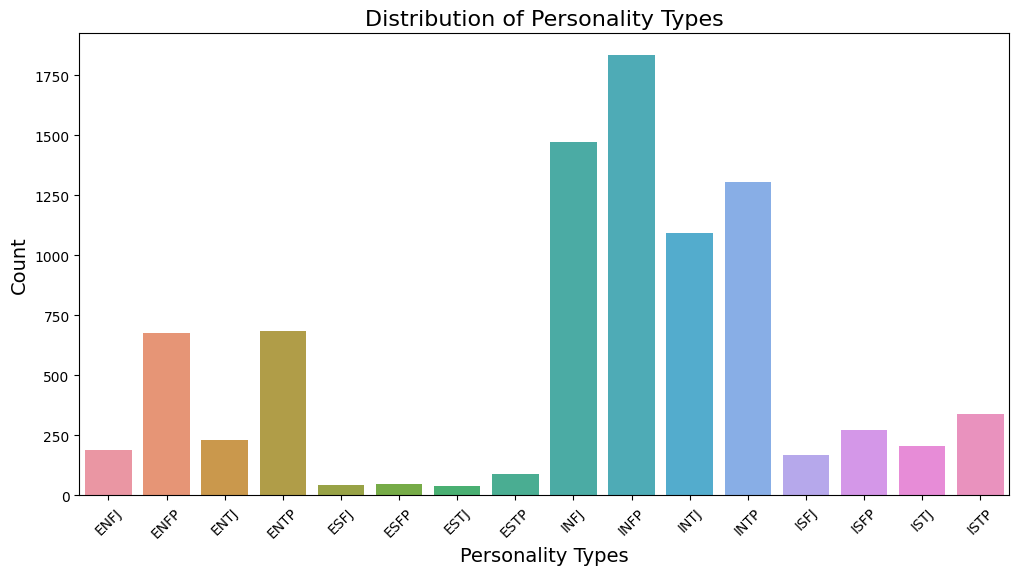

In [8]:
# Assuming 'total' DataFrame contains personality type counts
plt.figure(figsize=(12, 6))
sns.barplot(x=total.index, y=total['posts'])
plt.xlabel('Personality Types', size=14)
plt.ylabel('Count', size=14)
plt.title('Distribution of Personality Types', size=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


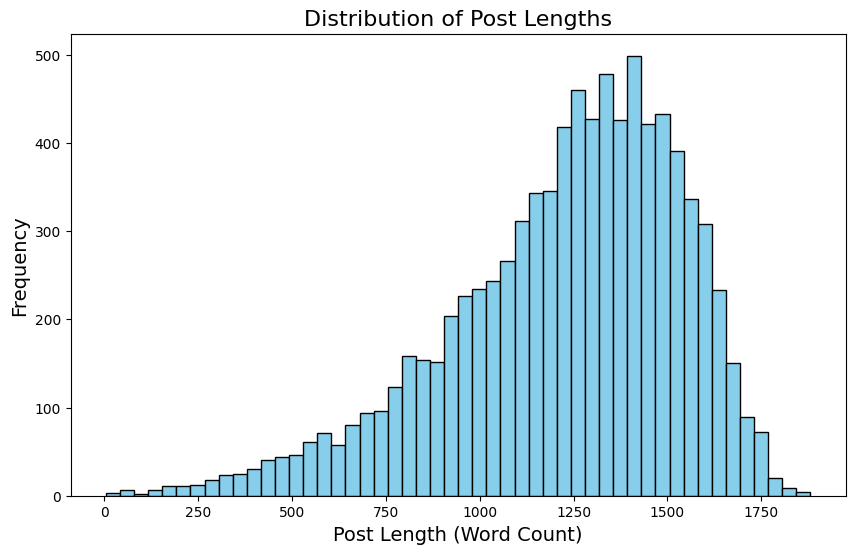

In [9]:

df['post_length'] = df['posts'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['post_length'], bins=50, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Post Length (Word Count)', size=14)
plt.ylabel('Frequency', size=14)
plt.title('Distribution of Post Lengths', size=16)
plt.show()

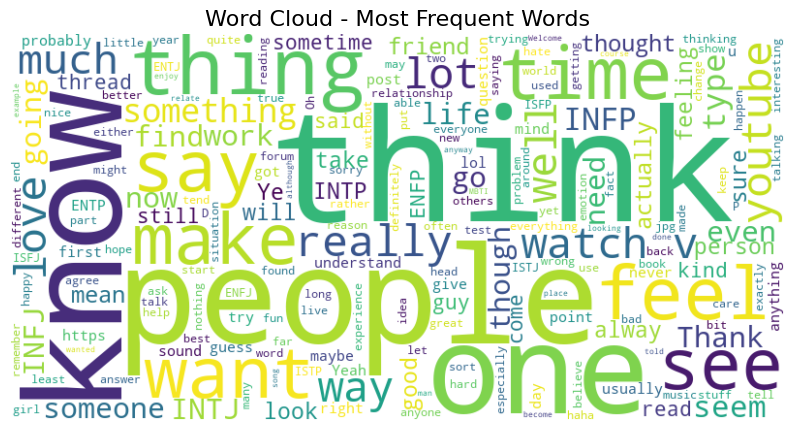

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['posts'])  


wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud - Most Frequent Words', size=16)
plt.show()

In [11]:
text = df.iloc[0:3].copy()
text

,type,posts,post_length
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,556
1,ENTP,'I'm finding the lack of me in these posts ver...,1170
2,INTP,'Good one _____ https://www.youtube.com/wat...,836


In [12]:
def split_text(text):
    return text.strip("'").split('|||')

In [13]:
df['posts'] = df['posts'].str.lower()
df

,type,posts,post_length
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,556
1,ENTP,'i'm finding the lack of me in these posts ver...,1170
2,INTP,'good one _____ https://www.youtube.com/wat...,836
3,INTJ,"'dear intp, i enjoyed our conversation the o...",1064
4,ENTJ,'you're fired.|||that's another silly misconce...,967
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edhb_h908||...,796
8671,ENFP,'so...if this thread already exists someplace ...,1309
8672,INTP,'so many questions when i do these things. i ...,948
8673,INFP,'i am very conflicted right now when it comes ...,1705


In [14]:
df['posts'] = df['posts'].apply(split_text)
df

,type,posts,post_length
0,INFJ,"[http://www.youtube.com/watch?v=qsxhcwe3krw, h...",556
1,ENTP,[i'm finding the lack of me in these posts ver...,1170
2,INTP,[good one _____ https://www.youtube.com/wat...,836
3,INTJ,"[dear intp, i enjoyed our conversation the o...",1064
4,ENTJ,"[you're fired., that's another silly misconcep...",967
...,...,...,...
8670,ISFP,"[https://www.youtube.com/watch?v=t8edhb_h908, ...",796
8671,ENFP,[so...if this thread already exists someplace ...,1309
8672,INTP,[so many questions when i do these things. i ...,948
8673,INFP,[i am very conflicted right now when it comes ...,1705


In [15]:
def join_strings(string_list, separator=' '):
    return separator.join(string_list)

# Convert 'posts' column to text
df['posts'] = df['posts'].apply(join_strings)
df

,type,posts,post_length
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw htt...,556
1,ENTP,i'm finding the lack of me in these posts very...,1170
2,INTP,good one _____ https://www.youtube.com/watc...,836
3,INTJ,"dear intp, i enjoyed our conversation the ot...",1064
4,ENTJ,you're fired. that's another silly misconcepti...,967
...,...,...,...
8670,ISFP,https://www.youtube.com/watch?v=t8edhb_h908 ix...,796
8671,ENFP,so...if this thread already exists someplace e...,1309
8672,INTP,so many questions when i do these things. i w...,948
8673,INFP,i am very conflicted right now when it comes t...,1705


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\altie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

def preprocess_text(text):
 
    text = re.sub(r'(http|https|www)\S+', 'link', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    processed_text = ' '.join(stemmed_tokens)
    
    return processed_text

In [18]:
df['posts'] = df['posts'].apply(preprocess_text)
df

,type,posts,post_length
0,INFJ,link link enfp intj moment link sportscent top...,556
1,ENTP,'m find lack post alarm . sex bore 's posit of...,1170
2,INTP,"good one _____ link cours , say know ; 's bles...",836
3,INTJ,"dear intp , enjoy convers day . esoter gab nat...",1064
4,ENTJ,'re fire . 's anoth silli misconcept . approac...,967
...,...,...,...
8670,ISFP,link ixfp alway think cat fi dom reason . link...,796
8671,ENFP,... thread alreadi exist someplac els ( : link...,1309
8672,INTP,mani question thing . would take purpl pill . ...,948
8673,INFP,conflict right come want children . honestli m...,1705


In [19]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['posts'])

feature_names = tfidf_vectorizer.get_feature_names_out() 

In [20]:
features_df = tfidf_matrix.toarray()
features_df

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04544078, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
new_df = pd.DataFrame()
new_df['type'] = enc.fit_transform(df['type'])

target = new_df['type'] 
target

0        8
1        3
2       11
3       10
4        2
        ..
8670    13
8671     1
8672    11
8673     9
8674     9
Name: type, Length: 8675, dtype: int32

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.33, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(5812, 85509) (5812,) (2863, 85509) (2863,)


In [23]:
accuracies = {}

random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

accuracy = accuracy_score(y_test, predictions)
accuracies['Random Forest'] = accuracy* 100.0 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 38.04%
